<a href="https://colab.research.google.com/github/Amyssjj/Agent_Influcencer/blob/main/Agent_Learn_insights_from_Youtube_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pre-requisition**

In [ ]:
!pip install youtube_transcript_api elevenlabs langfun --pre

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.7/388.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.1/655.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Let's add path of virtual environment site-packages to system path
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/jing_env_colab/colab_env/lib/python3.10/site-packages")
sys.path.append('/content/drive/MyDrive/ColabNotebooks')  # Replace with the folder path


import langfun as lf
import pyglove as pg
from typing import Literal
import pandas as pd
import numpy as np
import os
import google.generativeai as genai
from google.colab import userdata
from langfun.core.structured import function_generation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **The core of Langfun**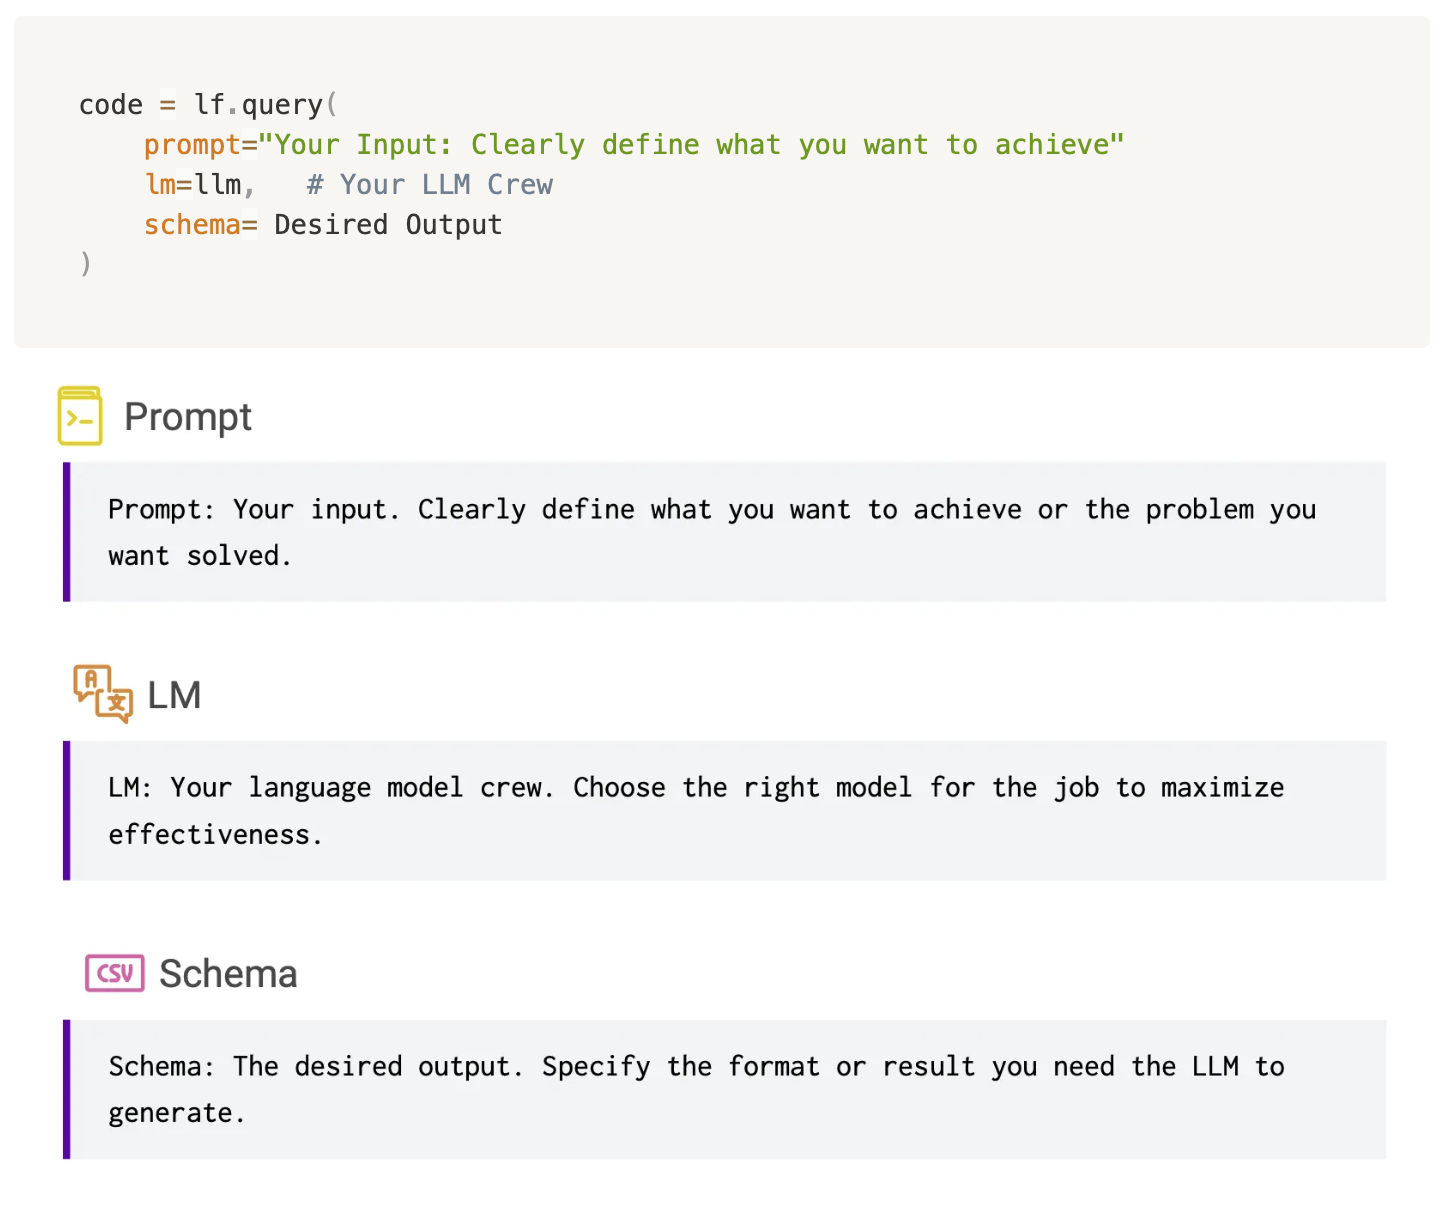

# **Build your crew to help you achieve your goal,  choose them wisely!**

In [ ]:
## Get the key and LLMs
gemini_key = userdata.get('gemini_key')
claude_key = userdata.get('claude_key')
openai_key = userdata.get('openai_key')
youtube_key = userdata.get('youtube_key')

## This is your crew, help to achieve your goal/tasks!! Choose them wisely, since each of them have different expertise.
lm_claude = lf.llms.Claude35Sonnet20241022(api_key=claude_key, temperature=0.6) ## good at coding
lm_openai = lf.llms.Gpt4o(api_key = openai_key, temperature=0.6) ## good at summarization

# **Task 1 - Help you Write the code to retrieval all the information from a Youtube Video**


In [51]:
code = lf.query(prompt = "Help me to write a python code that achieve retreival the youtube video basic info, caption, and comments",  # Your Request: What to generate code for
                lm = lm_claude,   # Your LLM Crew:  eg, Use Claude to write code
                schema=lf.PythonCode,  # Output: should be Python code
    )

In [52]:
code

PythonCode(source='\nfrom googleapiclient.discovery import build\nfrom youtube_transcript_api import YouTubeTranscriptApi\n\n# Set up YouTube API client\nAPI_KEY = \'YOUR_API_KEY\'  # Replace with your actual API key\nyoutube = build(\'youtube\', \'v3\', developerKey=API_KEY)\n\ndef get_video_info(video_id):\n    # Get video details\n    video_response = youtube.videos().list(\n        part=\'snippet,statistics\',\n        id=video_id\n    ).execute()\n    \n    video_info = video_response[\'items\'][0]\n    \n    # Get video captions\n    try:\n        captions = YouTubeTranscriptApi.get_transcript(video_id)\n    except:\n        captions = "No captions available"\n        \n    # Get video comments\n    comments = []\n    try:\n        comments_response = youtube.commentThreads().list(\n            part=\'snippet\',\n            videoId=video_id,\n            maxResults=100\n        ).execute()\n        \n        for item in comments_response[\'items\']:\n            comment = item[\'snippet\'][\'topLevelComment\'][\'snippet\']\n            comments.append({\n                \'author\': comment[\'authorDisplayName\'],\n                \'text\': comment[\'textDisplay\'],\n                \'likes\': comment[\'likeCount\'],\n                \'published_at\': comment[\'publishedAt\']\n            })\n    except:\n        comments = "Comments are disabled for this video"\n    \n    return {\n        \'title\': video_info[\'snippet\'][\'title\'],\n        \'description\': video_info[\'snippet\'][\'description\'], \n        \'view_count\': video_info[\'statistics\'][\'viewCount\'],\n        \'like_count\': video_info[\'statistics\'][\'likeCount\'],\n        \'comment_count\': video_info[\'statistics\'].get(\'commentCount\', 0),\n        \'captions\': captions,\n        \'comments\': comments\n    }\n\n# Example usage\nvideo_id = \'VIDEO_ID\'  # Replace with actual YouTube video ID\nvideo_data = get_video_info(video_id)\n\n# Print results\nprint(\'Title:\', video_data[\'title\'])\nprint(\'View count:\', video_data[\'view_count\'])\nprint(\'Captions:\', video_data[\'captions\'])\nprint(\'Comments:\', video_data[\'comments\'])\n')

In [ ]:
## Simply copy paste the code above,  and replace the API_KEY and Youtube_id you need to fetch!

from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi

# Replace with your API key
API_KEY = youtube_key

def get_video_info(video_id):
    # Create YouTube API client
    youtube = build('youtube', 'v3', developerKey=API_KEY)

    # Get video details
    video_response = youtube.videos().list(
        part='snippet,statistics',
        id=video_id
    ).execute()

    if not video_response['items']:
        return None

    video_info = video_response['items'][0]

    # Get video captions
    try:
        captions = YouTubeTranscriptApi.get_transcript(video_id)
    except:
        captions = None

    # Get video comments
    comments = []
    try:
        comments_response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100
        ).execute()

        for item in comments_response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append({
                'author': comment['authorDisplayName'],
                'text': comment['textDisplay'],
                'likes': comment['likeCount'],
                'published_at': comment['publishedAt']
            })
    except:
        pass

    return {
        'title': video_info['snippet']['title'],
        'description': video_info['snippet']['description'],
        'view_count': video_info['statistics']['viewCount'],
        'like_count': video_info['statistics']['likeCount'],
        'comment_count': video_info['statistics']['commentCount'],
        'captions': captions,
        'comments': comments
    }



In [ ]:
# Example usage:
video_id = 'VMj-3S1tku0'  # Replace with actual video ID
video_data = get_video_info(video_id)
video_data

{'title': 'The spelled-out intro to neural networks and backpropagation: building micrograd',
 'description': 'This is the most step-by-step spelled-out explanation of backpropagation and training of neural networks. It only assumes basic knowledge of Python and a vague recollection of calculus from high school.\n\nLinks:\n- micrograd on github: https://github.com/karpathy/micrograd\n- jupyter notebooks I built in this video: https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/micrograd\n- my website: https://karpathy.ai\n- my twitter: https://twitter.com/karpathy\n- "discussion forum": nvm, use youtube comments below for now :)\n- (new) Neural Networks: Zero to Hero series Discord channel: https://discord.gg/3zy8kqD9Cp , for people who\'d like to chat more and go beyond youtube comments\n\nExercises:\nyou should now be able to complete the following google collab, good luck!:\nhttps://colab.research.google.com/drive/1FPTx1RXtBfc4MaTkf7viZZD4U2F9gtKN?usp=sharing\n\nChapter

# **Task 2 - Help you learn the key insights from video and comments,  and start your learning/insights/understanding**

In [53]:
class MajorInsights(pg.Object):  ## Your output, you define it
  summary: str
  key_insights: str
  questions: str

major_insights = lf.query(prompt = "{{video_data}}", video_data=video_data, schema=MajorInsights, lm=lm_openai)

In [54]:
major_insights

MajorInsights(summary="The video provides an in-depth walkthrough of building a neural network from scratch using Python, focusing on backpropagation and automatic differentiation. The tutorial, led by Andrej Karpathy, introduces the micrograd library, which is a minimalist autograd engine for understanding neural networks' internals. The content is structured to gradually build up the complexity, starting from basic calculus concepts to implementing a full neural network with gradient descent optimization.", key_insights='1. The tutorial emphasizes the importance of understanding derivatives in neural network training and backpropagation. \n2. Micrograd is used to illustrate how to implement autograd functionality with minimal code, making the concepts more accessible. \n3. The video covers essential operations such as addition, multiplication, and non-linear activation functions like tanh, and explains their derivatives. \n4. A significant focus is placed on understanding the chain rule and its application in backpropagation. \n5. The video highlights common pitfalls in neural network training, such as forgetting to zero gradients before backpropagation. \n6. Practical insights into neural network optimization are provided, including discussions on learning rate tuning and gradient descent.', questions='1. How does micrograd compare to more complex libraries like PyTorch in terms of functionality and performance? \n2. What are the advantages and limitations of using a scalar-based autograd engine like micrograd for learning purposes? \n3. How can the concepts taught in this tutorial be scaled to more complex neural network architectures and datasets? \n4. What are some best practices for tuning hyperparameters like learning rate in neural network training? \n5. How does the choice of activation functions affect the training and performance of neural networks?')